In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprearing

In [448]:
df = pd.read_csv('./data/mpg.csv')

In [449]:
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [450]:
df.dropna(subset=['weight'],inplace=True)
df.dropna(subset=['mpg'],inplace=True)

In [451]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
5          70    usa           ford galaxie 500

In [452]:
mdf = df[['mpg','cylinders','horsepower','weight']]

In [453]:
# x1, x2, x3
x = mdf[['horsepower','weight', 'cylinders']]
y = mdf['mpg']

In [454]:
x.head()
y.head()

0    18.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: mpg, dtype: float64

In [455]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,                                                            test_size=0.3)

In [456]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 3)
(118, 3)
(273,)
(118,)


## 다중 회귀분석

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor
lr = LinearRegression()
#lr = BayesianRidge()
#lr = TweedieRegressor()

In [458]:
# 학습 시작
lr.fit(x_train,y_train)

LinearRegression()

In [459]:
r_sqaure = lr.score(x_test,y_test)
print(r_sqaure)

0.658914535460378


In [460]:
print(lr.coef_,lr.intercept_)

[-0.04897377 -0.00461147 -0.49791006] 44.90689275931973


In [461]:
y_hat = lr.predict(x_test)

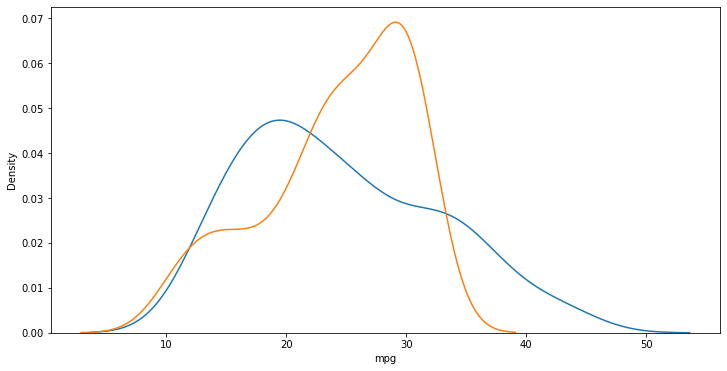

In [462]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat',ax=ax1)
plt.show()

In [463]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures

In [464]:
x_train.head()

horsepower  weight  cylinders
369        88.0    2395          4
347        65.0    1975          4
33        100.0    2634          6
187       140.0    4215          8
279        68.0    2135          4

In [465]:
poly = PolynomialFeatures(degree=2)  
# y = ax1^2 + bx1 + c + dx2^2 + ex2 + f + gx3^2 + hx3 + i + j 
poly_x_train= poly.fit_transform(x_train)

In [466]:
print(poly_x_train.shape)
print(poly_x_train)

(273, 10)
[[1.0000000e+00 8.8000000e+01 2.3950000e+03 ... 5.7360250e+06
  9.5800000e+03 1.6000000e+01]
 [1.0000000e+00 6.5000000e+01 1.9750000e+03 ... 3.9006250e+06
  7.9000000e+03 1.6000000e+01]
 [1.0000000e+00 1.0000000e+02 2.6340000e+03 ... 6.9379560e+06
  1.5804000e+04 3.6000000e+01]
 ...
 [1.0000000e+00 7.7000000e+01 3.5300000e+03 ... 1.2460900e+07
  1.7650000e+04 2.5000000e+01]
 [1.0000000e+00 6.5000000e+01 2.0200000e+03 ... 4.0804000e+06
  8.0800000e+03 1.6000000e+01]
 [1.0000000e+00 1.3700000e+02 4.0420000e+03 ... 1.6337764e+07
  3.2336000e+04 6.4000000e+01]]


In [467]:
lr.fit(poly_x_train,y_train)

LinearRegression()

In [468]:
poly_x_test = poly.fit_transform(x_test)

In [469]:
r_square = lr.score(poly_x_test, y_test)
print(r_square)

0.7088007611601115


In [470]:
y_test_hat = lr.predict(poly_x_test)

In [471]:
print(lr.coef_,lr.intercept_)

[ 0.00000000e+00 -2.95582658e-01 -5.94402451e-03 -5.27624526e+00
 -1.70702461e-05  9.61647098e-06  2.81730225e-02 -3.59473165e-07
  5.99711138e-04  4.61378782e-03] 72.85786201333323


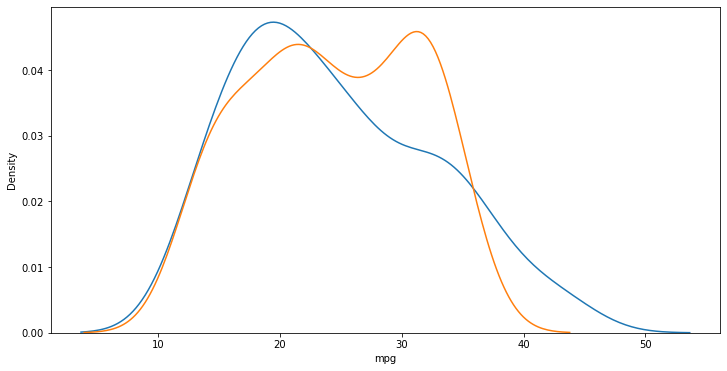

In [472]:
plt.figure(figsize=(12,6))
ax3 = sns.distplot(y_test,hist=False,label='y_test')
ax4 = sns.distplot(y_test_hat,hist=False,label='y_test_hat',ax=ax3)
plt.show()